In [1]:
import bamboolib as bam
%matplotlib inline
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
plt.style.use('ggplot')

from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import datasets

In [2]:
redata = pd.read_csv('Ames Real Estate Data.csv', sep=',', decimal='.')

ids = redata["MapRefNo"]
redata[ids.isin(ids[ids.duplicated()])] 
redata = redata.drop_duplicates(subset='MapRefNo', keep="first")
print(redata.shape)


(14235, 91)


In [3]:
# original dataset
housing = pd.read_csv('Ames_HousePrice.csv', sep=',', decimal='.', index_col=0)
print(housing.shape)
# train_housing=pd.read_csv('Ames_HousePrice.csv', index_col=0)
#Null Values
#1.Alley
housing["Alley"]=housing["Alley"].fillna("No_Alley")
#2.Basement Features
housing["BsmtQual"]=housing["BsmtQual"].fillna("No_basement")
housing["BsmtCond"]=housing["BsmtCond"].fillna("No_basement")
housing["BsmtExposure"]=housing["BsmtExposure"].fillna("No_basement")
housing["BsmtFinType1"]=housing["BsmtFinType1"].fillna(0)
housing["BsmtFinType2"]=housing["BsmtFinType2"].fillna(0)
housing["BsmtHalfBath"]=housing["BsmtHalfBath"].fillna(0)
housing["BsmtFullBath"]=housing["BsmtFullBath"].fillna(0)
#3. Fireplace
housing["FireplaceQu"]=housing["FireplaceQu"].fillna("No_Fireplace")
#4. Garage Features
garage_new_features = ['GarageType','GarageFinish','GarageQual','GarageCond','GarageYrBlt']
for i in garage_new_features:
    housing[i]=housing[i].fillna("No_garage")
#Fence
housing["Fence"]=housing["Fence"].fillna("No_Fence")
#Pool
housing["PoolQC"]=housing["PoolQC"].fillna("No_Pool")
#Misc features
housing["MiscFeature"]=housing["MiscFeature"].fillna("No_MiscFeature")
housing["Electrical"]=housing["Electrical"].fillna("Unknown")
housing["MasVnrType"]=housing["MasVnrType"].fillna("Unknown")
housing["MasVnrArea"]=housing["MasVnrArea"].fillna(0)
housing["LotFrontage"]=housing["LotFrontage"].fillna(0)


#1. Normal sales only
housing =housing[housing['SaleCondition']=='Normal']
print(housing.shape)
housing = housing.drop(['PID'], axis = 1)
prices        = housing['SalePrice']
housing = housing.drop(['SalePrice'], axis = 1)

print(housing.shape)
print(prices.shape)
housing

(2580, 81)
(2414, 81)
(2414, 79)
(2414,)


,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,856,30,RL,0.0,7890,Pave,No_Alley,Reg,Lvl,AllPub,...,166,0,No_Pool,No_Fence,No_MiscFeature,0,3,2010,WD,Normal
2,1049,120,RL,42.0,4235,Pave,No_Alley,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,2,2009,WD,Normal
3,1001,30,C (all),60.0,6060,Pave,No_Alley,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,11,2007,WD,Normal
4,1039,70,RL,80.0,8146,Pave,No_Alley,Reg,Lvl,AllPub,...,111,0,No_Pool,No_Fence,No_MiscFeature,0,5,2009,WD,Normal
5,1665,60,RL,70.0,8400,Pave,No_Alley,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,30,RL,0.0,8854,Pave,No_Alley,Reg,Lvl,AllPub,...,40,0,No_Pool,No_Fence,No_MiscFeature,0,5,2009,WD,Normal
760,1733,20,RL,0.0,13680,Pave,No_Alley,IR1,Lvl,AllPub,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,6,2009,WD,Normal
761,2002,90,RH,82.0,6270,Pave,No_Alley,Reg,HLS,AllPub,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,8,2007,WD,Normal
762,1842,60,RL,0.0,8826,Pave,No_Alley,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,7,2007,WD,Normal


In [4]:
housing_d = pd.get_dummies(housing, columns=housing.columns[~housing.columns.isin(housing._get_numeric_data().columns)])
housing_d.shape


(2414, 404)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_d,prices,test_size=0.2)

In [213]:
# housing_train = pd.read_csv('train_housing_dropnull.csv', sep=',', decimal='.').dropna().drop(['Unnamed: 0', 'PID'], axis = 1)
# # housing_train
# print(housing_train.shape)
# # will have 293 columns here
# housing_train_d = pd.get_dummies(housing_train, columns=housing_train.columns[~housing_train.columns.isin(housing_train._get_numeric_data().columns)])
# # housing_train_d
# # housing.columns[~housing.columns.isin(housing._get_numeric_data().columns)]
# print(housing_train_d.shape)
# # only 247 columns?
# # housing_train = pd.read_csv('train_final.csv', sep=',', decimal='.')#.drop(['Unnamed: 0', 'PID'], axis = 1)
# # housing_train


In [214]:
# housing_test = pd.read_csv('test_housing.csv', sep=',', decimal='.')#.dropna().drop(['Unnamed: 0', 'PID'], axis = 1)
# # housing_train
# print(housing_test.shape)
# housing_test_d = pd.get_dummies(housing_test, columns=housing_test.columns[~housing_test.columns.isin(housing_test._get_numeric_data().columns)])
# print(housing_test_d.shape)


In [13]:
 ## investigate a plausible reason for the price drop when sq.ft increases

In [154]:
np.count_nonzero(housing['PoolArea'], axis=0)

9

In [155]:
price        = housing['SalePrice']
size_related = housing.filter(regex='SF$|Area$')
# size_related

In [156]:
size_related.isnull().sum(axis=0)

GrLivArea        0
LotArea          0
MasVnrArea      14
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
PoolArea         0
dtype: int64

In [159]:
size_related = size_related.fillna(0.0)  # We fill the very minor missing values by 0.0
F_values, p_values = f_regression(size_related, housing['SalePrice'])

pd.Series(p_values, index=size_related.columns).sort_values()

GrLivArea        0.000000e+00
TotalBsmtSF     7.306053e-313
1stFlrSF        1.616946e-300
GarageArea      6.423062e-291
MasVnrArea      4.164095e-162
WoodDeckSF       6.015295e-68
OpenPorchSF      2.930048e-57
LotArea          8.303020e-46
2ndFlrSF         4.007008e-42
BsmtUnfSF        8.441921e-18
PoolArea         1.172748e-01
LowQualFinSF     1.173873e-01
dtype: float64

<AxesSubplot:>

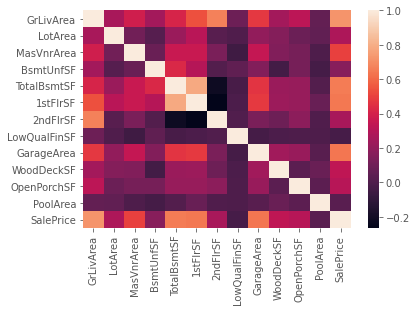

In [160]:
import seaborn as sns
corr = pd.concat([size_related, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

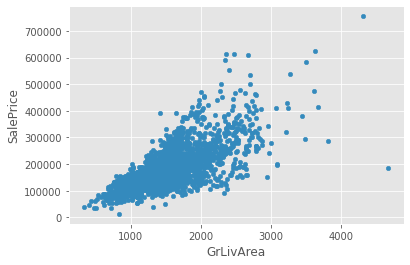

In [161]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

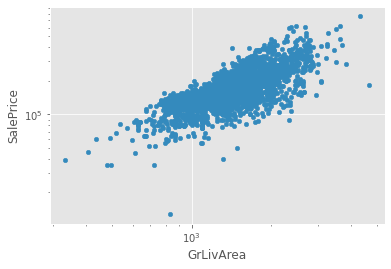

In [162]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice', logx=True, logy=True)

In [163]:
lm = LinearRegression()
grLivArea = size_related[['GrLivArea']]
lm.fit(grLivArea, price)
lm.score(grLivArea, price)

0.5183732056699006

In [164]:
lm.fit(np.log10(grLivArea), np.log10(price))
lm.score(np.log10(grLivArea), np.log10(price))

0.5400973491971155

In [165]:
lm.intercept_, lm.coef_

(2.4423420230274036, array([0.88110363]))

In [166]:
Nbr_quantile = housing.groupby('Neighborhood')['GrLivArea'].quantile(0.8)
joint_Nbr_quantile = pd.merge(housing[['Neighborhood']], Nbr_quantile, how='left', left_on='Neighborhood', right_index=True)


In [167]:
joint_Nbr_quantile

,Neighborhood,GrLivArea
0,SWISU,1896.0
1,Edwards,1560.0
2,IDOTRR,1558.0
3,OldTown,1786.6
4,NWAmes,2038.4
...,...,...
2575,BrkSide,1563.0
2576,Edwards,1560.0
2577,Crawfor,1987.4
2578,CollgCr,1796.0


In [168]:
smaller_home = grLivArea.GrLivArea < joint_Nbr_quantile.GrLivArea
lm.fit(np.log10(grLivArea)[smaller_home], np.log10(price)[smaller_home])
lm.intercept_, lm.coef_

(2.0850091977242267, array([0.99983166]))

In [169]:
lm.fit(np.log10(grLivArea)[~smaller_home],np.log10(price)[~smaller_home])
lm.intercept_, lm.coef_

(1.4706789908596356, array([1.16147633]))

In [172]:
from scipy.stats import pearsonr

def calculate_pvalues(df1):
    df1 = df1._get_numeric_data().dropna()
    dfcols = pd.DataFrame(columns=df1.columns)
#     print(dfcols)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
#     print(pvalues)
    for r in df1.columns:
        for c in df1.columns:
            pvalues[r][c] = round(pearsonr(df1[r], df1[c])[0], 4)
    return pvalues

In [177]:
housnum = calculate_pvalues(housing)

In [178]:
housnum = housnum.reset_index()
housnum = housnum.sort_values(by=['SalePrice'], ascending=[False])
housnum

,index,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
3,SalePrice,-0.0342,-0.2374,0.7229,1.0,-0.0824,0.3533,0.3211,0.7963,-0.1545,...,0.6466,0.3404,0.3289,-0.1373,0.0105,0.1155,0.0317,-0.0169,0.0023,0.0055
7,OverallQual,-0.0352,-0.2625,0.5713,0.7963,0.0708,0.1687,0.1183,1.0,-0.1508,...,0.5304,0.2641,0.3175,-0.1556,-0.0064,0.0396,-0.0059,-0.0214,0.008,0.0169
2,GrLivArea,-0.0169,-0.1062,1.0,0.7229,0.0786,0.3366,0.2894,0.5713,-0.1442,...,0.4987,0.2599,0.3401,-0.0103,-0.0118,0.0928,0.067,-0.0126,0.0312,-0.019
15,TotalBsmtSF,-0.0266,-0.2132,0.4307,0.6764,-0.2244,0.3017,0.2499,0.5574,-0.2155,...,0.5017,0.2306,0.2467,-0.1139,0.0166,0.0758,0.009,0.0006,-0.0026,0.0199
16,1stFlrSF,-0.0345,-0.1839,0.5422,0.6662,-0.2601,0.4259,0.3362,0.5003,-0.1947,...,0.5185,0.2338,0.2347,-0.0976,0.0198,0.1118,0.0865,0.0005,0.0211,-0.0036
28,GarageCars,-0.0261,-0.204,0.5275,0.6529,-0.0004,0.3106,0.2143,0.5785,-0.2732,...,0.8561,0.2365,0.2453,-0.1247,0.0069,0.0086,0.0241,-0.0386,0.0337,0.0107
29,GarageArea,-0.0197,-0.1909,0.4987,0.6466,-0.0688,0.3503,0.2372,0.5304,-0.2451,...,1.0,0.2377,0.2664,-0.1007,0.0063,0.0343,0.0269,-0.0239,0.0307,0.0119
9,YearBuilt,-0.0189,-0.3476,0.2305,0.5472,0.0604,0.0883,0.0332,0.5889,-0.4485,...,0.4646,0.2351,0.2131,-0.3582,0.0083,-0.0579,0.0051,-0.0317,-0.0156,0.0292
21,FullBath,-0.0091,-0.1656,0.6281,0.5433,0.1403,0.155,0.126,0.5349,-0.2544,...,0.4451,0.1934,0.2936,-0.1423,0.0064,-0.0141,0.0045,-0.031,0.0252,0.0302
27,GarageYrBlt,-0.0371,-0.2772,0.2754,0.5318,0.0845,0.0538,0.0275,0.5673,-0.3594,...,0.5821,0.249,0.2323,-0.2984,0.0109,-0.0659,-0.0083,-0.0206,-0.0062,0.0394


<AxesSubplot:>

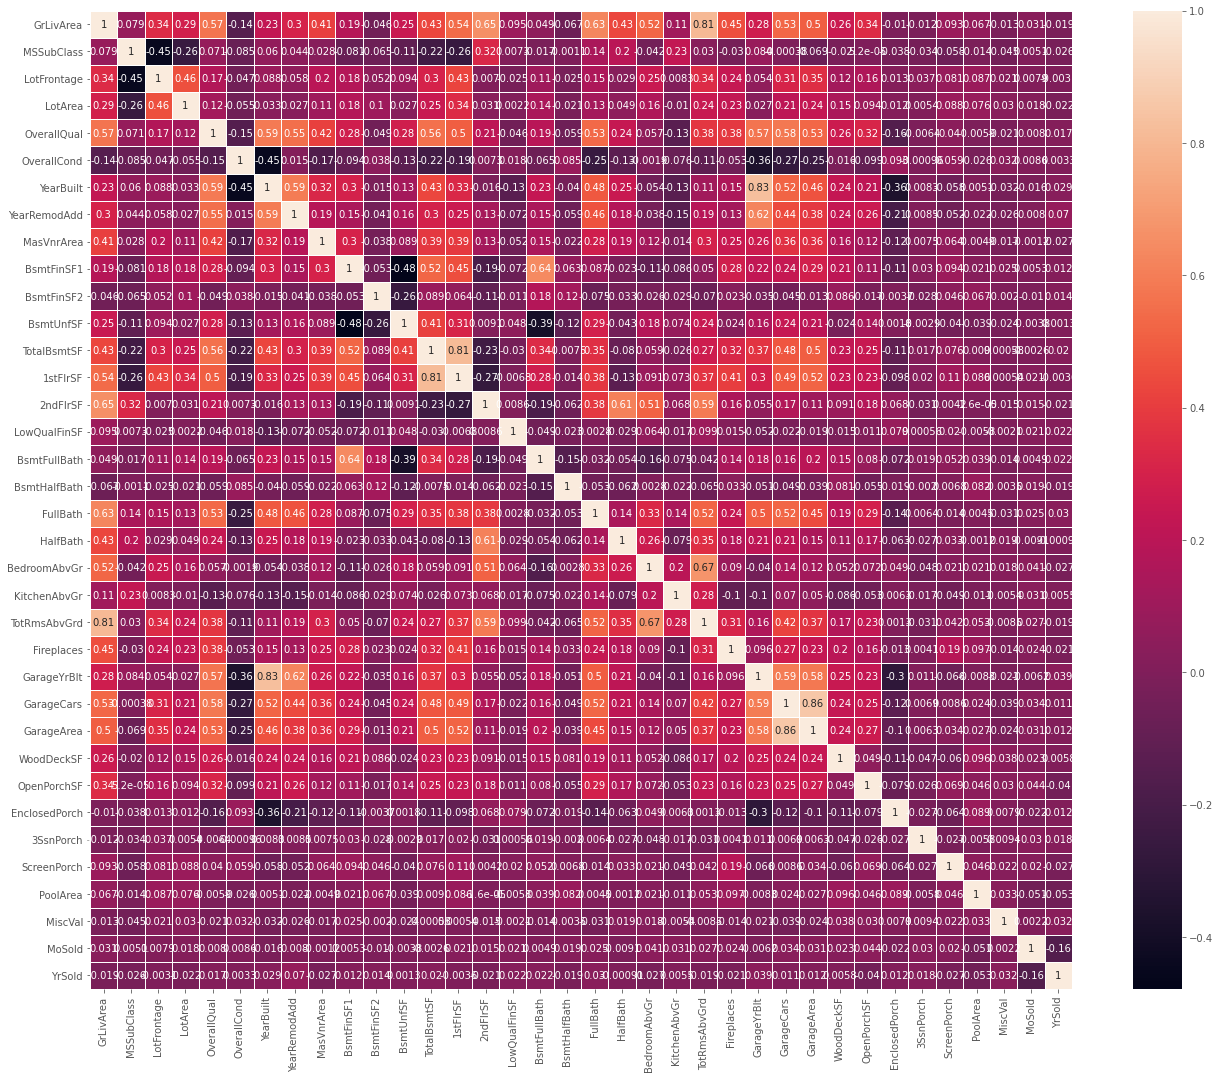

In [179]:
import matplotlib.pyplot as plt
# sns.heatmap(housing.drop(['SalePrice', 'PID', 'Unnamed: 0'],axis = 1)._get_numeric_data().dropna().corr())
fig, ax = plt.subplots(figsize=(22,18))         # Sample figsize in inches
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(housing.drop(['SalePrice', 'PID', 'Unnamed: 0'],axis = 1)._get_numeric_data().dropna().corr(), annot=True, linewidths=.5, ax=ax)



In [180]:
price        = housing['SalePrice']
# bathroom_related = housing.filter(regex='Bath$|Bath$|bath$|$bath')
bathroom_related = housing.filter(regex='LotArea|GrLivArea|TotalBsmtSF|GarageCars|Bath$|Bath$|bath$|$bath')
bathroom_related


,GrLivArea,LotArea,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,GarageCars
0,856,7890,856.0,1.0,0.0,1,0,2.0
1,1049,4235,1049.0,1.0,0.0,2,0,1.0
2,1001,6060,837.0,0.0,0.0,1,0,1.0
3,1039,8146,405.0,0.0,0.0,1,0,1.0
4,1665,8400,810.0,1.0,0.0,2,1,2.0
...,...,...,...,...,...,...,...,...
2575,952,8854,952.0,0.0,0.0,1,0,1.0
2576,1733,13680,0.0,0.0,0.0,2,0,2.0
2577,2002,6270,1001.0,0.0,0.0,2,0,3.0
2578,1842,8826,985.0,1.0,0.0,2,1,2.0


In [181]:
bathroom_related = pd.concat([bathroom_related, housing['SalePrice']], axis=1)
bathroom_related.isnull().sum(axis=0)
bathroom_related =  bathroom_related.dropna()
bathroom_related['SalePrice'] = np.log(bathroom_related['SalePrice'])
bathroom_related['GrLivArea'] = np.log(bathroom_related['GrLivArea'])
bathroom_related['TotalBsmtSF'] = np.log(bathroom_related['TotalBsmtSF'])


In [182]:
bathroom_related

,GrLivArea,LotArea,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,GarageCars,SalePrice
0,6.752270,7890,6.752270,1.0,0.0,1,0,2.0,11.744037
1,6.955593,4235,6.955593,1.0,0.0,2,0,1.0,11.845820
2,6.908755,6060,6.729824,0.0,0.0,1,0,1.0,11.735269
3,6.946014,8146,6.003887,0.0,0.0,1,0,1.0,11.643954
4,7.417580,8400,6.697034,1.0,0.0,2,1,2.0,12.332705
...,...,...,...,...,...,...,...,...,...
2575,6.858565,8854,6.858565,0.0,0.0,1,0,1.0,11.703546
2576,7.457609,13680,-inf,0.0,0.0,2,0,2.0,11.846536
2577,7.601902,6270,6.908755,0.0,0.0,2,0,3.0,11.884489
2578,7.518607,8826,6.892642,1.0,0.0,2,1,2.0,12.289954


In [185]:
ols = LinearRegression()

In [186]:
# X = bathroom_related[['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']]
X = bathroom_related[['GrLivArea', 'GarageCars', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']]

# X = pd.DataFrame(columns = mat.design_info.column_names[1:])
y = bathroom_related['SalePrice']
ols.fit(X, y)

LinearRegression()

In [187]:
X
ols.coef_
bathroom_related

,GrLivArea,LotArea,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,GarageCars,SalePrice
0,6.752270,7890,6.752270,1.0,0.0,1,0,2.0,11.744037
1,6.955593,4235,6.955593,1.0,0.0,2,0,1.0,11.845820
2,6.908755,6060,6.729824,0.0,0.0,1,0,1.0,11.735269
3,6.946014,8146,6.003887,0.0,0.0,1,0,1.0,11.643954
4,7.417580,8400,6.697034,1.0,0.0,2,1,2.0,12.332705
...,...,...,...,...,...,...,...,...,...
2575,6.858565,8854,6.858565,0.0,0.0,1,0,1.0,11.703546
2576,7.457609,13680,-inf,0.0,0.0,2,0,2.0,11.846536
2577,7.601902,6270,6.908755,0.0,0.0,2,0,3.0,11.884489
2578,7.518607,8826,6.892642,1.0,0.0,2,1,2.0,12.289954


In [189]:
# array([4.02343083e-01, 6.32717943e+01, 3.52948625e+01, 3.52948625e+01,
#        1.64457070e+04, 1.79049958e+04, 2.16975185e+04, 7.31593760e+03])
# array([   60.28404587,    59.83042369, 23832.55433729,  7190.08327586,
#        12103.01802738, 19453.43263363,  7116.41762786])
# array([   81.47655484, 32642.49463308,  7277.86798615, -3036.83317505,
#        32149.36420497, 12546.48777388])

In [120]:
# X_train = housing_train_d.drop('SalePrice', axis=1)
# y_train = housing_train_d['SalePrice']
# # housing_numeric

In [42]:
ridge = Ridge()

In [43]:
ridge.set_params(alpha = 0, normalize=True)

Ridge(alpha=0, normalize=True)

In [45]:
ridge.fit(house_features, prices)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
ridge.coef_

the ridge intercept is: 217831.41


array([ 4.03408358e+01, -1.16203958e+02,  5.00878243e-01,  1.41937172e+04,
        4.68466673e+03,  3.95188734e+02,  1.76627142e+02,  2.09254400e+01,
        5.61410413e+00, -2.70397296e+00,  2.13500625e+01,  3.01964038e+01,
        2.96805032e+01, -9.56267164e-02,  2.69970364e+03, -3.19349753e+03,
       -1.47012251e+03, -7.10963510e+02, -1.26484087e+04, -1.48665933e+04,
        2.86266893e+03,  2.20241141e+03, -1.15032434e+03,  2.99817813e+01,
        9.93580882e+00,  5.58146454e+00,  1.42362076e+01, -2.20122530e+01,
        2.93199352e+01, -4.09909327e+00, -1.45334455e+02, -6.94311188e+02])

In [6]:
lasso  = Lasso()
alphas = np.linspace(0.7,40.7,41)
lasso.set_params(normalize=True)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha, normalize=True)
        lasso.fit(X_train, y_train)  
        
        coefs_lasso.append(lasso.coef_)
        print('Accuracy of lasso with lambda {:.2f} on train set: {:.2f}'.format(alpha, lasso.score(X_train, y_train)))
        print('Accuracy of lasso on train set: {:.2f}'.format(lasso.score(X_test, y_test)))



coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)  
coefs_lasso = coefs_lasso.reset_index()
coefs_lasso

Accuracy of lasso with lambda 0.70 on train set: 0.96
Accuracy of lasso on train set: 0.93
Accuracy of lasso with lambda 1.70 on train set: 0.96
Accuracy of lasso on train set: 0.93
Accuracy of lasso with lambda 2.70 on train set: 0.95
Accuracy of lasso on train set: 0.93
Accuracy of lasso with lambda 3.70 on train set: 0.95
Accuracy of lasso on train set: 0.93
Accuracy of lasso with lambda 4.70 on train set: 0.95
Accuracy of lasso on train set: 0.93
Accuracy of lasso with lambda 5.70 on train set: 0.95
Accuracy of lasso on train set: 0.93
Accuracy of lasso with lambda 6.70 on train set: 0.95
Accuracy of lasso on train set: 0.93
Accuracy of lasso with lambda 7.70 on train set: 0.95
Accuracy of lasso on train set: 0.93
Accuracy of lasso with lambda 8.70 on train set: 0.95
Accuracy of lasso on train set: 0.93
Accuracy of lasso with lambda 9.70 on train set: 0.95
Accuracy of lasso on train set: 0.93
Accuracy of lasso with lambda 10.70 on train set: 0.95
Accuracy of lasso on train set: 0.9

,index,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Normal
0,0.7,51.423938,-52.965987,37.194805,0.720470,6130.004274,5642.836153,304.778189,80.855515,27.311013,...,-593.039736,6524.152961,11368.354689,-0.0,-8365.335505,8480.812963,-6288.866905,-5524.050914,0.0,0.0
1,1.7,51.776923,-43.241117,35.064656,0.687984,6175.115454,5566.145061,297.195107,85.354712,26.552991,...,-212.833464,5391.494994,11249.117867,0.0,-6578.645067,6888.043998,-2989.341853,-3463.601184,0.0,0.0
2,2.7,52.427279,-40.034048,34.787346,0.652879,6239.780091,5447.891735,287.846341,86.431009,25.857909,...,-0.000000,4160.416305,10537.891676,0.0,-4971.734559,6109.060467,-0.000000,-1136.208323,0.0,0.0
3,3.7,53.265815,-42.065446,34.084291,0.624755,6281.017009,5349.570348,280.765165,84.166585,25.324878,...,-0.000000,3421.155770,9922.813033,-0.0,-3726.990460,5479.416664,-0.000000,-0.000000,0.0,0.0
4,4.7,54.035170,-43.132059,33.141612,0.603690,6326.056486,5254.490819,278.901506,82.865999,24.846756,...,-0.000000,2707.373691,9187.079061,-0.0,-2406.594116,4707.900047,-0.000000,-0.000000,-0.0,0.0
5,5.7,54.740459,-47.540416,32.095835,0.587001,6379.742877,5165.295100,278.448720,83.295085,24.177622,...,-0.000000,2040.497088,8523.698119,-0.0,-1051.979001,4014.104940,-0.000000,-0.000000,-0.0,0.0
6,6.7,55.436229,-51.295231,31.250423,0.574003,6476.508208,5070.270879,276.251424,85.051134,23.461341,...,-0.000000,1327.529035,7928.395482,-0.0,-0.000000,3277.864784,-0.000000,-0.000000,-0.0,0.0
7,7.7,56.070236,-53.731926,30.426096,0.562408,6570.690012,4970.889842,273.989249,86.279828,22.871812,...,-0.000000,575.634538,7331.513680,-0.0,-0.000000,2479.588298,-0.000000,-0.000000,-0.0,0.0
8,8.7,56.606748,-51.505524,29.651334,0.550588,6652.914994,4887.218010,272.428665,87.251010,22.277269,...,-0.000000,0.000000,6730.763077,-0.0,-0.000000,1616.198934,-0.000000,-0.000000,-0.0,0.0
9,9.7,56.642608,-50.045821,28.438050,0.542202,6723.826905,4802.348922,269.506614,89.068596,21.721754,...,-0.000000,0.000000,6173.578257,-0.0,-0.000000,732.075131,-0.000000,-0.000000,-0.0,0.0


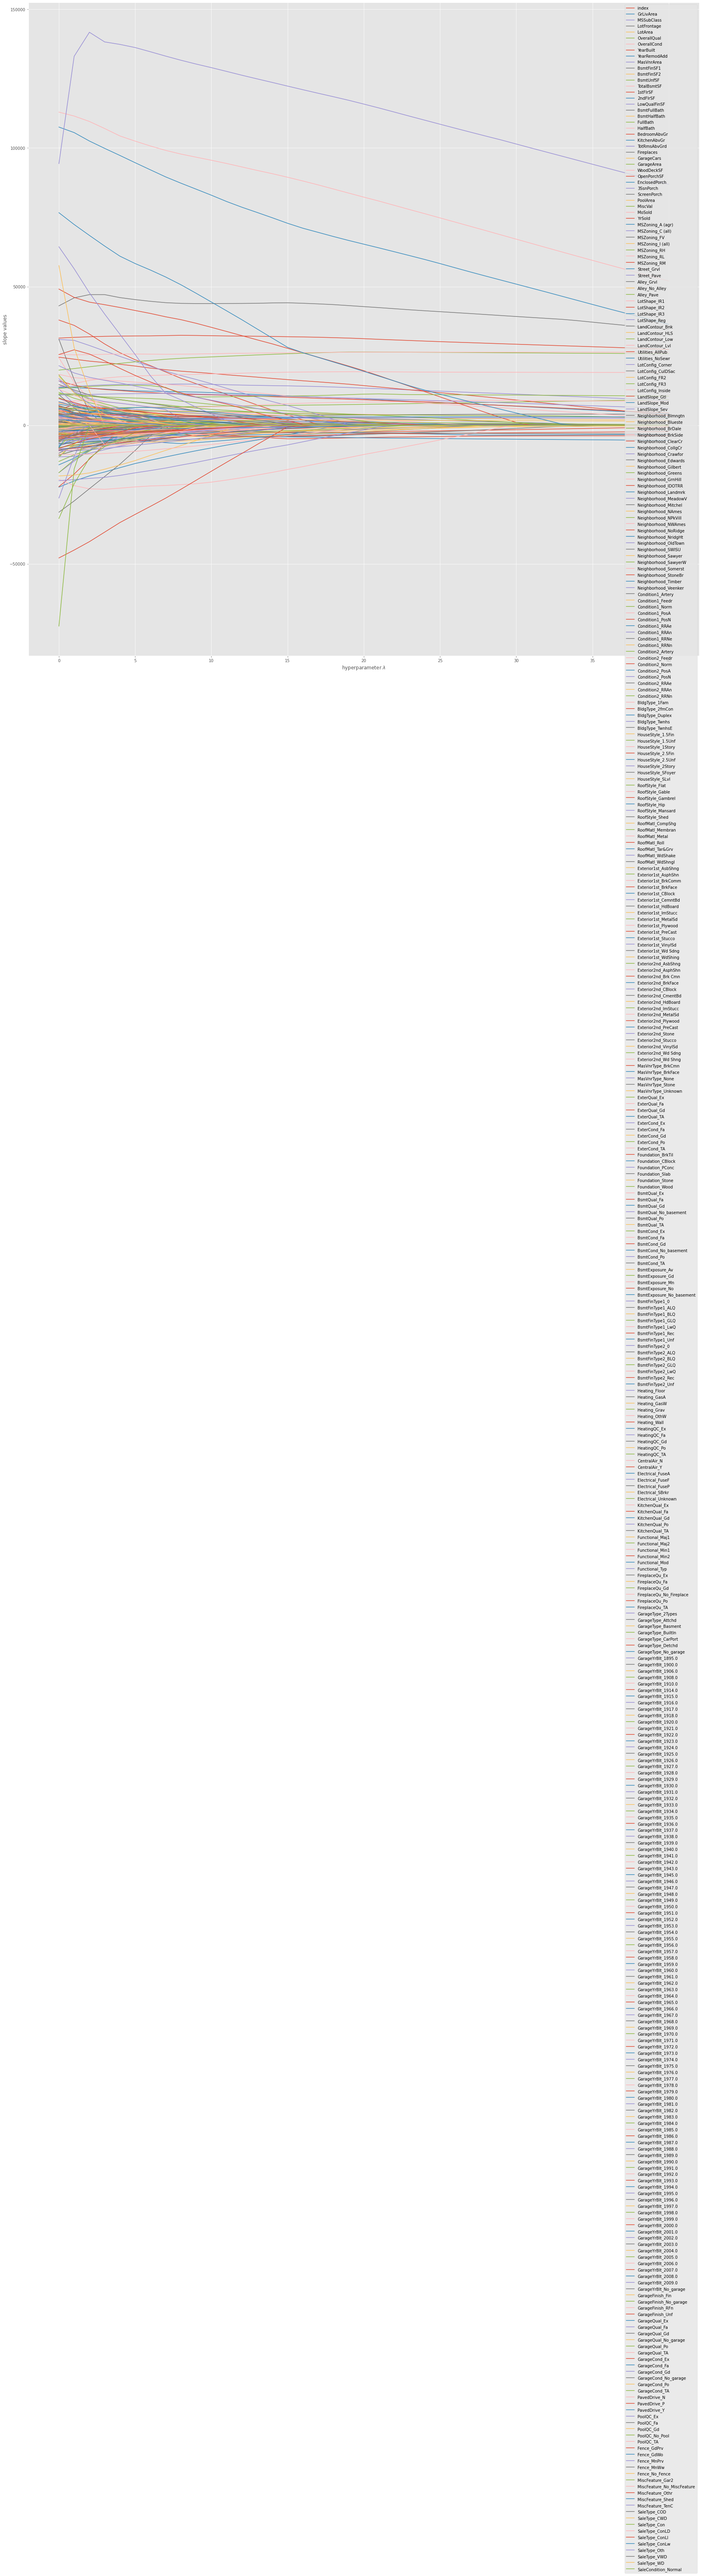

In [7]:
plt.rcParams['figure.figsize'] = (30,30)
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)   

In [79]:
elasticnet = ElasticNet(normalize=True)
N_alpha = 100
N_rho   = 10
alphaRange = np.logspace(-10, 2, N_alpha)
rhoRange   = np.linspace(0.1,1, N_rho) # we avoid very small rho by starting at 0.1
scores     = np.zeros((N_rho, N_alpha))
for alphaIdx, alpha in enumerate(alphaRange):
    for rhoIdx, rho in enumerate(rhoRange):
            elasticnet.set_params(alpha=alpha, l1_ratio=rho, normalize=True)
            elasticnet.fit(house_features, prices)
            scores[rhoIdx, alphaIdx] = elasticnet.score(house_features, prices)  
scores


array([[8.80133700e-01, 8.80133700e-01, 8.80133700e-01, 8.80133700e-01,
        8.80133700e-01, 8.80133700e-01, 8.80133700e-01, 8.80133700e-01,
        8.80133700e-01, 8.80133700e-01, 8.80133700e-01, 8.80133700e-01,
        8.80133700e-01, 8.80133700e-01, 8.80133700e-01, 8.80133700e-01,
        8.80133700e-01, 8.80133700e-01, 8.80133699e-01, 8.80133699e-01,
        8.80133698e-01, 8.80133697e-01, 8.80133695e-01, 8.80133692e-01,
        8.80133688e-01, 8.80133682e-01, 8.80133673e-01, 8.80133658e-01,
        8.80133632e-01, 8.80133574e-01, 8.80133447e-01, 8.80133181e-01,
        8.80132667e-01, 8.80131743e-01, 8.80130157e-01, 8.80127467e-01,
        8.80122876e-01, 8.80115013e-01, 8.80101574e-01, 8.80078741e-01,
        8.80040271e-01, 8.79976126e-01, 8.79870553e-01, 8.79699531e-01,
        8.79427687e-01, 8.79005016e-01, 8.78364007e-01, 8.77417905e-01,
        8.76060539e-01, 8.74167264e-01, 8.71595029e-01, 8.68177749e-01,
        8.63711609e-01, 8.57925053e-01, 8.50431118e-01, 8.406660

In [73]:
?elasticnet

In [77]:
scores[scores > 0.885]

array([], dtype=float64)